In [1]:
# customer curn analysis in Telecom 
# churn means switching from one company to another

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [12]:
col=df.columns
col

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

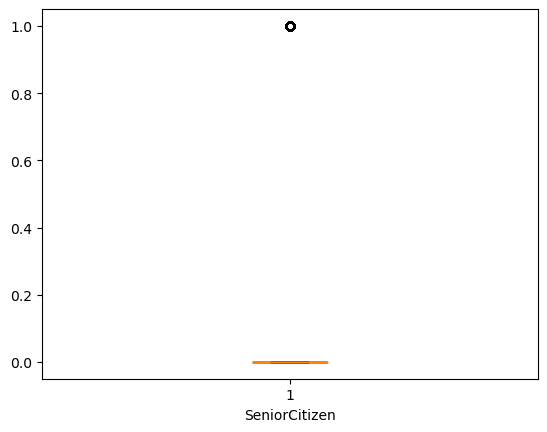

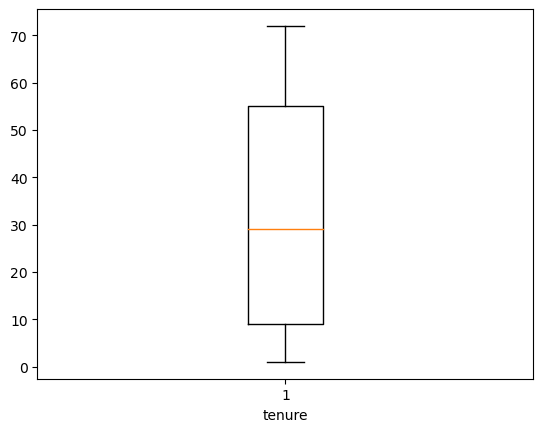

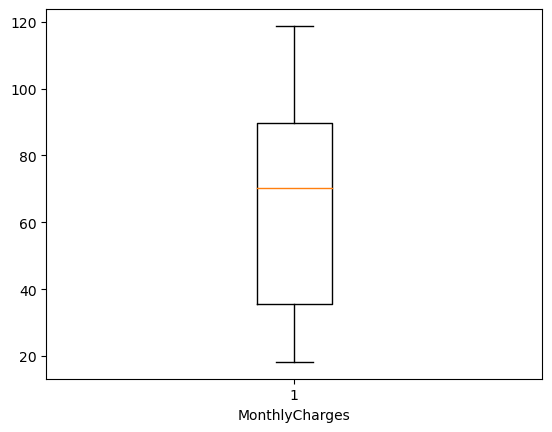

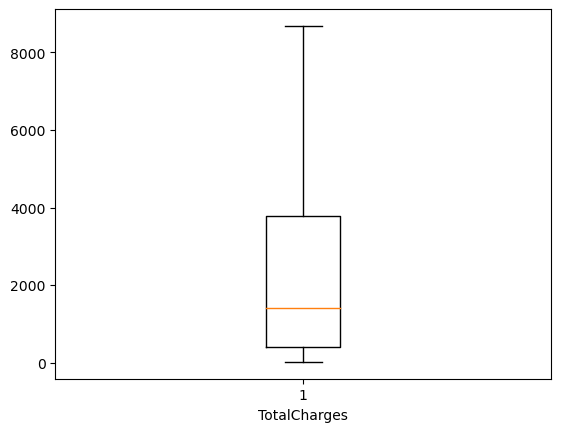

In [14]:
# outliers

for i in col:
    if (df[i].dtype!='object'):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

In [15]:
col

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [20]:
# no outlier

# now label encoding

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [21]:
for i in col:
    if (df[i].dtype==object):
        df[i]=le.fit_transform(df[i])

In [22]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4843,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1524,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3358,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5923,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


In [23]:
col

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

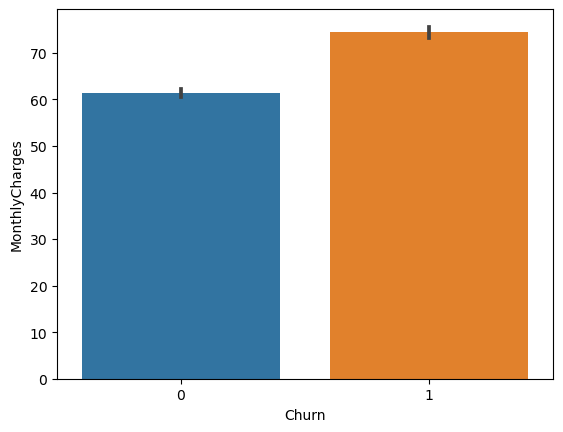

In [24]:
# visualization

sns.barplot(df['Churn'],df['MonthlyCharges'])

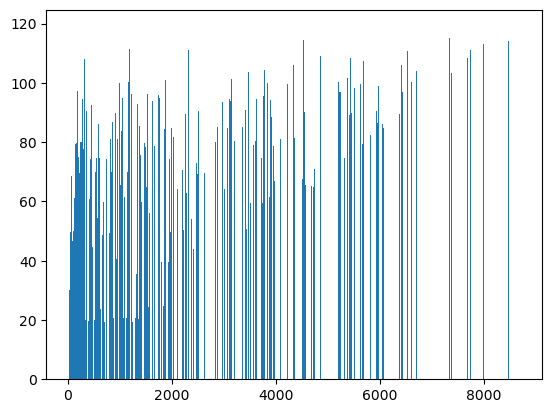

In [27]:
plt.bar(df['TotalCharges'],df['MonthlyCharges'])
plt.show()

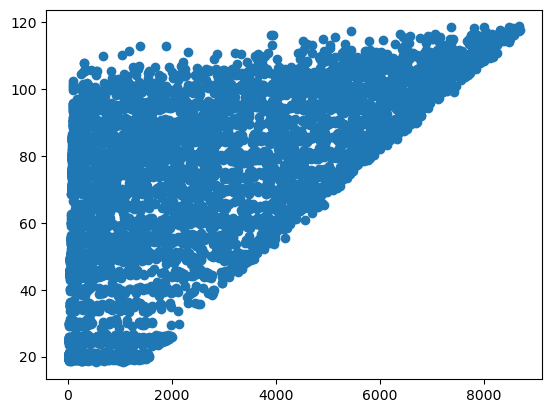

In [28]:
plt.scatter(df['TotalCharges'],df['MonthlyCharges'])
plt.show()

<AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>

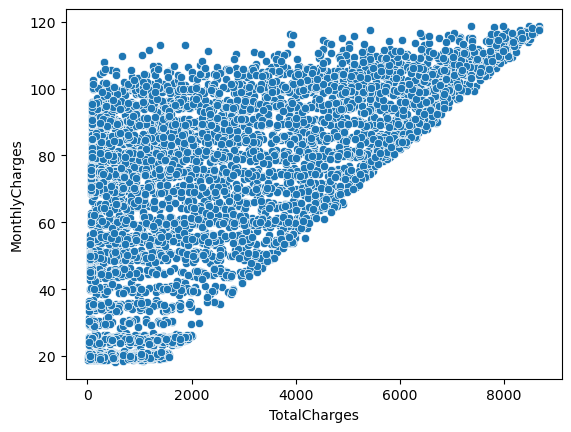

In [29]:
sns.scatterplot(df['TotalCharges'],df['MonthlyCharges'])

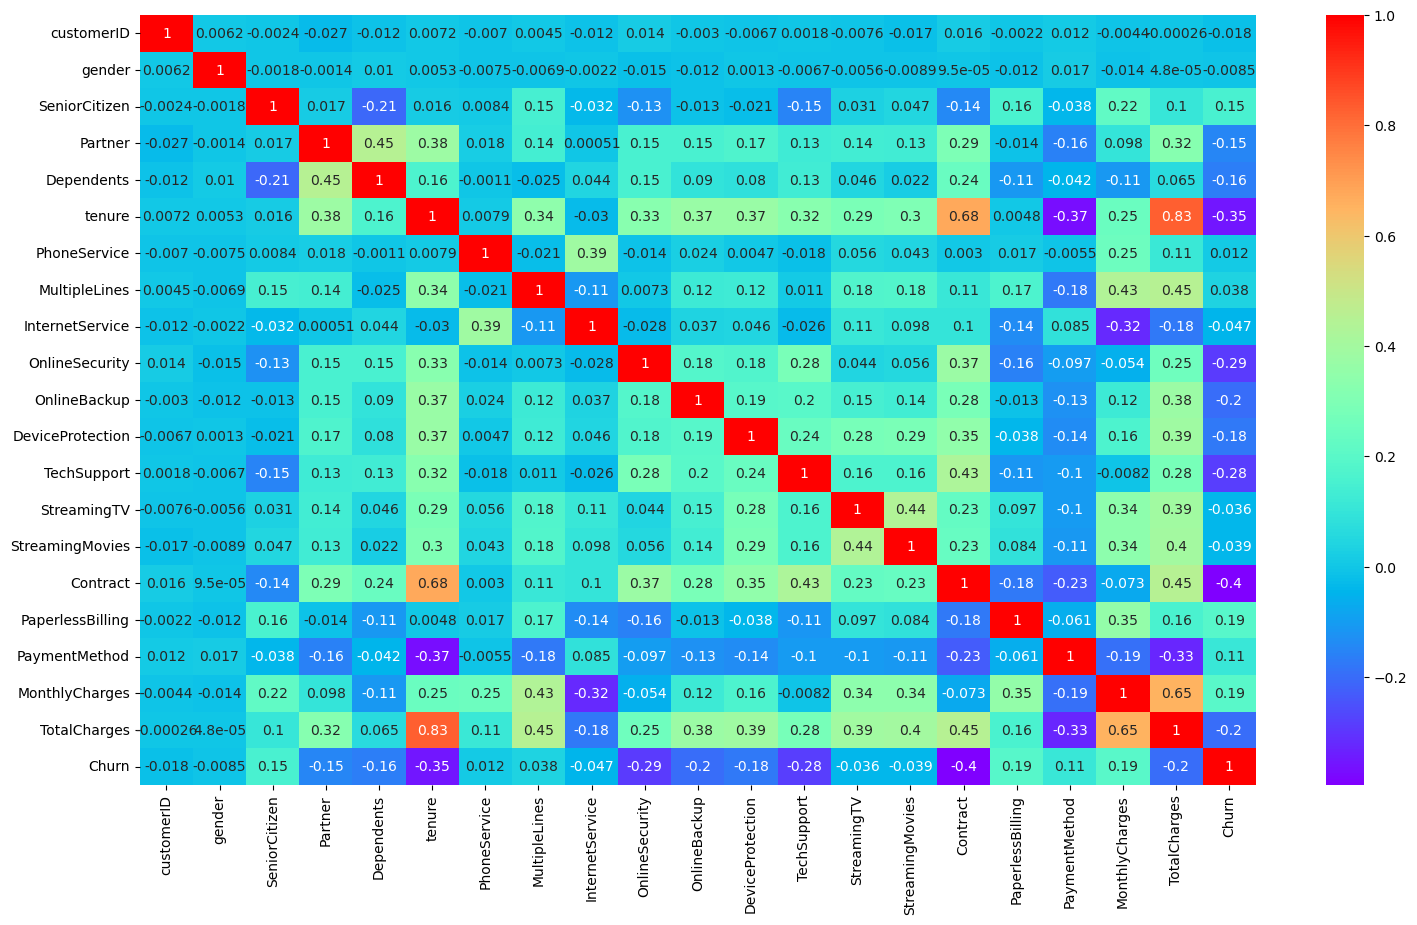

In [37]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')
plt.show()

In [38]:
# there is only one correlation that is high positive
# b/w TotaLCharges and tenure (0.83)

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

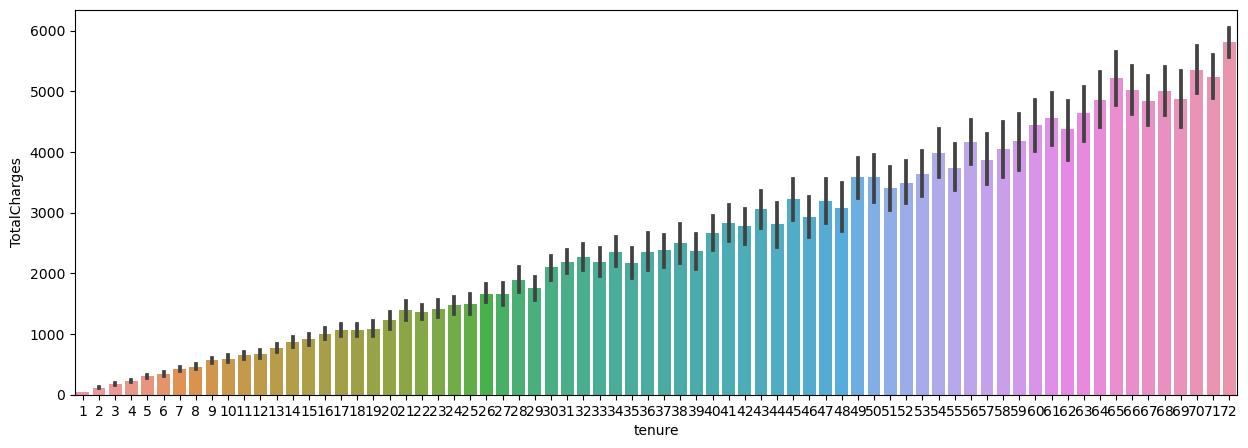

In [48]:
plt.figure(figsize=(15,5))
sns.barplot(y='TotalCharges',x='tenure',data=df)

<AxesSubplot:xlabel='PaymentMethod', ylabel='TotalCharges'>

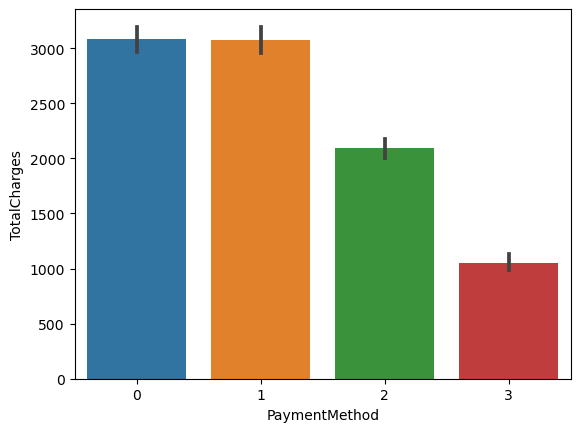

In [52]:
sns.barplot(y='TotalCharges',x='PaymentMethod',data=df)

In [53]:
# modelbuilding

x=df.iloc[:,:-1]

In [57]:
# we dont need customerid for further prediction so drop it

x=x.drop(['customerID'],axis=1)

In [58]:
y=df['Churn']

In [60]:
print(x.shape,y.shape,df.shape)

(7032, 19) (7032,) (7032, 21)


In [61]:
# splitting data into train and test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [63]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4922, 19) (2110, 19) (4922,) (2110,)


In [65]:
# model implementation

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=50,random_state=45)

In [66]:
# training the model

rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=45)

In [67]:
# predicting

y_pred=rfc.predict(x_test)
print(y_pred.shape,y_test.shape)

(2110,) (2110,)


In [68]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [69]:
accuracy_score(y_pred,y_test)

0.7834123222748816

In [70]:
est=list(range(50,1000,50))
est

[50,
 100,
 150,
 200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 800,
 850,
 900,
 950]

In [78]:
for i in est:
    rf=RandomForestClassifier(n_estimators=i,random_state=0)
    rf.fit(x_train,y_train)
    y_predict=rf.predict(x_test)
    acc=accuracy_score(y_predict,y_test)*100
    print(f'no of estimator : {i} ---  accuracy : {acc}')
    

no of estimator : 50 ---  accuracy : 78.90995260663507
no of estimator : 100 ---  accuracy : 79.0521327014218
no of estimator : 150 ---  accuracy : 79.28909952606635
no of estimator : 200 ---  accuracy : 79.24170616113744
no of estimator : 250 ---  accuracy : 79.19431279620854
no of estimator : 300 ---  accuracy : 79.0521327014218
no of estimator : 350 ---  accuracy : 79.00473933649289
no of estimator : 400 ---  accuracy : 79.24170616113744
no of estimator : 450 ---  accuracy : 79.14691943127961
no of estimator : 500 ---  accuracy : 79.19431279620854
no of estimator : 550 ---  accuracy : 79.00473933649289
no of estimator : 600 ---  accuracy : 79.0521327014218
no of estimator : 650 ---  accuracy : 79.00473933649289
no of estimator : 700 ---  accuracy : 79.00473933649289
no of estimator : 750 ---  accuracy : 79.0995260663507
no of estimator : 800 ---  accuracy : 79.19431279620854
no of estimator : 850 ---  accuracy : 79.28909952606635
no of estimator : 900 ---  accuracy : 79.194312796208

In [79]:
rfcc=RandomForestClassifier(n_estimators=150,random_state=0)
rfcc.fit(x_train,y_train)
y_pred=rfcc.predict(x_test)
accuracy_score(y_pred,y_test)

0.7928909952606635

<AxesSubplot:>

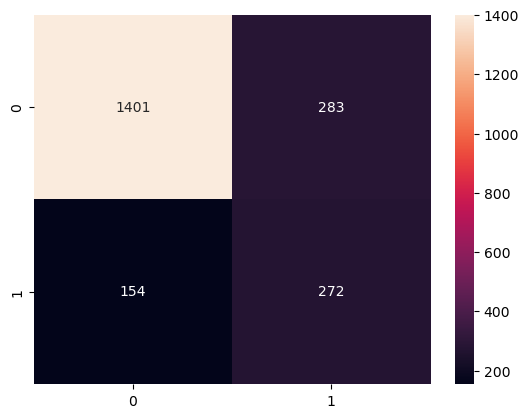

In [98]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='G')

In [100]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.83      0.87      1684
           1       0.49      0.64      0.55       426

    accuracy                           0.79      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.82      0.79      0.80      2110

